In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas # For CSV parsing
from mpl_toolkits.mplot3d import axes3d, Axes3D 

In [2]:
%run closuresim.py

# Import our GLEAM Sources


In [76]:
LST_HOUR = 3.5
LST_RADIANS = (LST_HOUR/24)*(2*numpy.pi)

GLEAM_CSV_DIR="/Users/jameskent/Library/Mobile Documents/com~apple~CloudDocs/PhD/Academic/Closures/"

In [100]:
gleam_sources = pandas.read_csv(GLEAM_CSV_DIR+"gleam_catalogue_full.csv",header=0,sep=',')

## We need to shoehorn in a few strong sources that are not in the GLEAM catalogue by default, but are almost point sources with HERA's dirty beam
# These sources are:
# - Fornax A
# - Cassiopeia A
# - Cygnus A
# - Centaurus A
# - Messier 87

strong_sources = []
strong_sources.insert(0, {'Record #': -1,'GLEAM': "Fornax A", "RAJ2000": 50.675, "e_RAJ2000": 0.0, "DEJ2000": -37.083, "Fpwide":0.0, "Fintwide":750.0})
strong_sources.insert(0, {'Record #': -2,'GLEAM': "Cassiopeai A", "RAJ2000": 350.85, "e_RAJ2000": 0.0, "DEJ2000": 58.8167, "Fpwide":0.0, "Fintwide":1000.0})
strong_sources.insert(0, {'Record #': -3,'GLEAM': "Cygnus A", "RAJ2000": 299.8667, "e_RAJ2000": 0.0, "DEJ2000": 40.7339, "Fpwide":0.0, "Fintwide":1000.0})
strong_sources.insert(0, {'Record #': -4,'GLEAM': "Centaurus A", "RAJ2000": 201.37, "e_RAJ2000": 0.0, "DEJ2000": -43.0192, "Fpwide":0.0, "Fintwide":1000.0})
strong_sources.insert(0, {'Record #': -4,'GLEAM': "Messier 87", "RAJ2000": 187.7042, "e_RAJ2000": 0.0, "DEJ2000": 12.3911, "Fpwide":0.0, "Fintwide":1000.0})

gleam_sources = pandas.concat([pandas.DataFrame(strong_sources),gleam_sources],ignore_index=True,sort=False)


In [5]:
gleam_sources

,DEJ2000,Fintwide,Fpwide,GLEAM,RAJ2000,Record #,e_RAJ2000,e_DEJ2000
0,12.391100,1000.000000,0.0,Messier 87,187.704200,-4,0.000000,NaN
1,-43.019200,1000.000000,0.0,Centaurus A,201.370000,-4,0.000000,NaN
2,40.733900,1000.000000,0.0,Cygnus A,299.866700,-3,0.000000,NaN
3,58.816700,1000.000000,0.0,Cassiopeai A,350.850000,-2,0.000000,NaN
4,-37.083000,1000.000000,0.0,Fornax A,50.675000,-1,0.000000,NaN
5,-89.687309,0.248581,262282.0,J235139-894114,357.914368,1,0.002407,0.002410
6,-89.213310,0.150291,160685.0,J223320-891247,338.336243,2,0.002644,0.005215
7,-89.155968,0.320281,311750.0,J231335-890921,348.399048,3,0.002009,0.002866
8,-88.750610,1.589200,1540468.0,J230111-884502,345.296844,4,0.000436,0.000480
9,-88.740990,0.192555,137430.0,J211508-884427,318.784729,5,0.000327,0.006515


In [104]:
ra = numpy.radians(gleam_sources['RAJ2000'])
dec = numpy.radians(gleam_sources['DEJ2000'])

In [105]:
ha,dec = radec_to_hadec(ra,dec,LST_RADIANS)

In [106]:
ha

0        -2.359758
1        -2.598272
2        -4.317363
3        -5.207190
4         0.031852
5        -5.330486
6        -4.988784
7        -5.164413
8        -5.110269
9        -4.647545
10       -5.185246
11       -5.225557
12       -4.945188
13       -5.103841
14       -5.354603
15       -5.270511
16       -4.773549
17       -4.893163
18       -4.859884
19       -4.857295
20       -5.110043
21       -4.805212
22       -5.138228
23       -5.030559
24       -4.744222
25       -5.181983
26       -4.985443
27       -5.322002
28       -4.755416
29       -4.887834
            ...   
307430   -3.594869
307431   -3.352025
307432   -3.606828
307433   -3.732447
307434   -3.473645
307435   -3.621072
307436   -3.552266
307437   -3.593339
307438   -3.422289
307439   -3.692347
307440   -3.660800
307441   -3.481860
307442   -3.416676
307443   -3.318109
307444   -3.760160
307445   -3.688352
307446   -3.323732
307447   -3.091850
307448   -3.515959
307449   -3.506705
307450   -3.466474
307451   -4.

In [107]:
HERA_LAT= numpy.radians(-30.43)
print(HERA_LAT)
alt,az = hadec_to_altaz(ha,dec,HERA_LAT)

-0.5311036913818745


In [108]:
print(min(az))
print(max(az))
print(min(alt))
print(max(alt))

7.756294020618834e-05
6.2831549481892
-1.559266897044437
1.5702081643132941


In [109]:
l,m,n = altaz_to_dircos(alt,az)

In [110]:
print(min(l),max(l))
print(min(m),max(m))
print(min(n),max(n))


-0.9999966577213376 0.9999874652830416
-0.9916529530663158 0.8689833407000173
-0.999999987366926 -1.7296754739604125e-07


# Now generate a HERA Layout as in the simpler example.

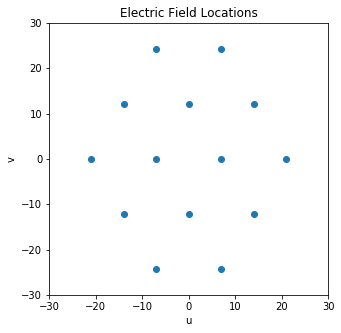

In [111]:
locs = generate_hera_layout_simple()
us = locs[:,0]
vs = locs[:,1]
ws = locs[:,2]
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(us,vs)
ax.set_title('Electric Field Locations')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
ax.set_xlabel('u'); ax.set_ylabel('v');# ax.set_zlabel('v'); 

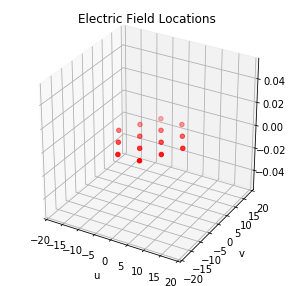

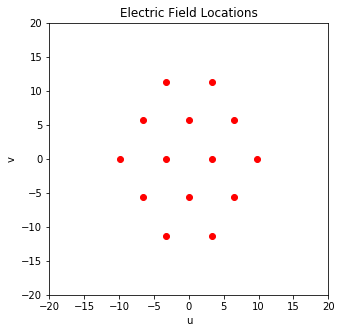

In [112]:
frequency = 140e6 # Let's just do this in a single channel for now.
chan_bw = 25e3

wavelength = 3e8 / frequency

locs_uvw = locs/wavelength

us_uvw = locs_uvw[:,0]
vs_uvw = locs_uvw[:,1]
ws_uvw = locs_uvw[:,2]

fig, ax = plt.subplots(figsize=(5,5),subplot_kw={'projection': '3d'})
ax.scatter(us_uvw,vs_uvw,ws_uvw,color='red')
ax.set_title('Electric Field Locations')
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
ax.set_xlabel('u'); ax.set_ylabel('v');
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(us_uvw,vs_uvw,color='red')
ax.set_title('Electric Field Locations')
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
ax.set_xlabel('u'); ax.set_ylabel('v');
plt.show()

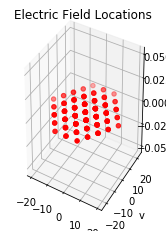

In [113]:
baselines = generate_baseline_vectors(locs_uvw)
plot_baselines(baselines)

In [114]:
baselines = baselines.reshape(baselines.shape[0]**2,baselines.shape[2])

In [115]:
# Including zero spacings, possible error term here?
def generate_dirty_beam(baselines,grid_size):
    
    grid = numpy.zeros(shape=(grid_size,grid_size),dtype=numpy.complex128)
    
    for baseline in baselines:
        
        u = baseline[0]
        v = baseline[1]
        w = baseline[2]
        
        uc = int(numpy.floor(u + grid_size/2))
        vc = int(numpy.floor(v + grid_size/2))
        #print(uc,vc)
        grid[vc,uc] += 1.0 + 0j
        
    grid = numpy.fft.fftshift(grid)
    grid = numpy.fft.fft2(grid)
    grid = numpy.fft.fftshift(grid)
    return grid    

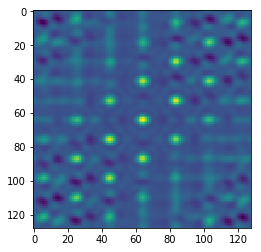

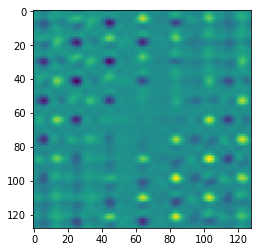

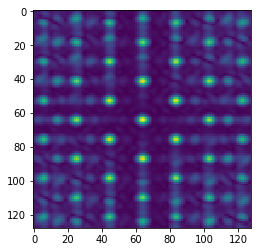

In [116]:
db = generate_dirty_beam(baselines,128)
plt.imshow(numpy.real(db))
plt.show()
plt.imshow(numpy.imag(db))
plt.show()
plt.imshow(numpy.abs(db))
plt.show()

What a horrible dirty beam, but I guess that's what regular arrays will get you...

Now generate a sky and convolve it with the dirty beam. 

First we need to find all the gleam sources above the horizon during the time of observation. Get rid of any below a certain Jansky value or the simulation will be excruciatingly slow.

In [132]:
def find_gleam_sources(source_dataframe,lst,latitude,jy_threshold):
    ra = numpy.radians(source_dataframe['RAJ2000'])
    dec = numpy.radians(source_dataframe['DEJ2000'])
    ha,dec = radec_to_hadec(ra,dec,lst)
    alt,az = hadec_to_altaz(ha,dec,latitude)
    
    #First threshold by finding everything above the horizon.
    
    above_horizon = alt > 0
    #print(above_horizon.shape)
    #alts = alt[above_horizon]
    #azs = az[above_horizon]
    
    # Now threshold by the jansky's
    jy = source_dataframe['Fintwide']
    jy_above_threshold = jy > jy_threshold
    
    sky_sources = numpy.logical_and(above_horizon,jy_above_threshold)
    
    # Now extract from pandas into normal numpy arrays
    alts = alt[sky_sources].values
    azs = az[sky_sources].values
    jys = jy[sky_sources].values
    
    print("Number of Sources: ",alts.shape)
    gleam_sources = {'alt':alts,
                    'az': azs,
                    'jy': jys}
    
    return gleam_sources
    
    
    
    
    

In [133]:
sources = find_gleam_sources(gleam_sources,LST_RADIANS,HERA_LAT,8.0)

Number of Sources:  (225,)


In [134]:
from scipy.signal import convolve2d
def generate_sky_from_sources(sources,grid_size):
    
    az=sources['az']
    alt=sources['alt']
    jy=sources['jy']
    
    l,m,n=altaz_to_dircos(alt,az)
    
    
    no_points = az.shape[0]
    lm_step = 2/grid_size
    sky = numpy.zeros(shape=(grid_size,grid_size),dtype=numpy.complex128)
    
    
    # Put sources onto sky grid
    for i in numpy.arange(no_points):
    
        lc = int(numpy.floor(l[i]/lm_step) - grid_size/2)
        mc = int(numpy.floor(m[i]/lm_step) - grid_size/2)
        
        sky[mc,lc] += jy[i]
    
    
    
    return sky

In [135]:
sky = generate_sky_from_sources(sources,128)
dba = numpy.abs(db)


## Our sky before HERA's beam...

LST(Radians):  0.9162978572970231


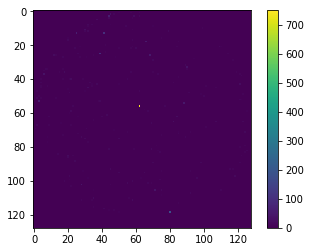

In [136]:
print("LST(Radians): ",LST_RADIANS)
plt.imshow(numpy.abs(sky))
plt.colorbar()
plt.show()

## And after... 

(128, 128)


<function matplotlib.pyplot.show(*args, **kw)>

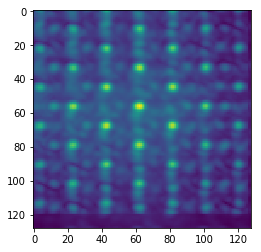

In [137]:
hera_sky = convolve2d(sky,dba)
    
# Now truncate the sky to remove anything outside the celestial sphere
    
db_size = db.shape[0]
dbh = int(db_size/2)
hera_sky = hera_sky[dbh:-dbh+1,dbh:-dbh+1]
print(sky.shape)
plt.imshow(numpy.abs(hera_sky))
plt.show

# Let's move onto closure simulations. 

First lets generate some non-chromatic beams for each antenna. Then simulate visibilities and see how things change for closures.



In [159]:
means = numpy.asarray([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
x,beams_matrix_vis,be = generate_gaussian_power_beams(locs_uvw,means,lb=0.05,ub=0.35,lbp=5.0,ubp=10.0)

print("Beam Error: ",be*100,"%")

0.09607568114925398
Beam Error:  9.607568114925398 %


In [160]:
def print_beams_matrix(x,beams_matrix):
    
    no_of_beams = beams_matrix.shape[0]
    
    fig = plt.figure(figsize=(10,15))
    for i in numpy.arange(0,no_of_beams):
        ax1 = fig.add_subplot(no_of_beams,3,3*i+1)
        ax2 = fig.add_subplot(no_of_beams,3,3*i+2)
        ax3 = fig.add_subplot(no_of_beams,3,3*i+3)
        ax1.plot(x,beams_matrix[i,:].real)
        ax2.plot(x,beams_matrix[i,:].imag)
        ax3.plot(x,numpy.abs(beams_matrix[i,:]))
    plt.tight_layout()
    plt.show()
    

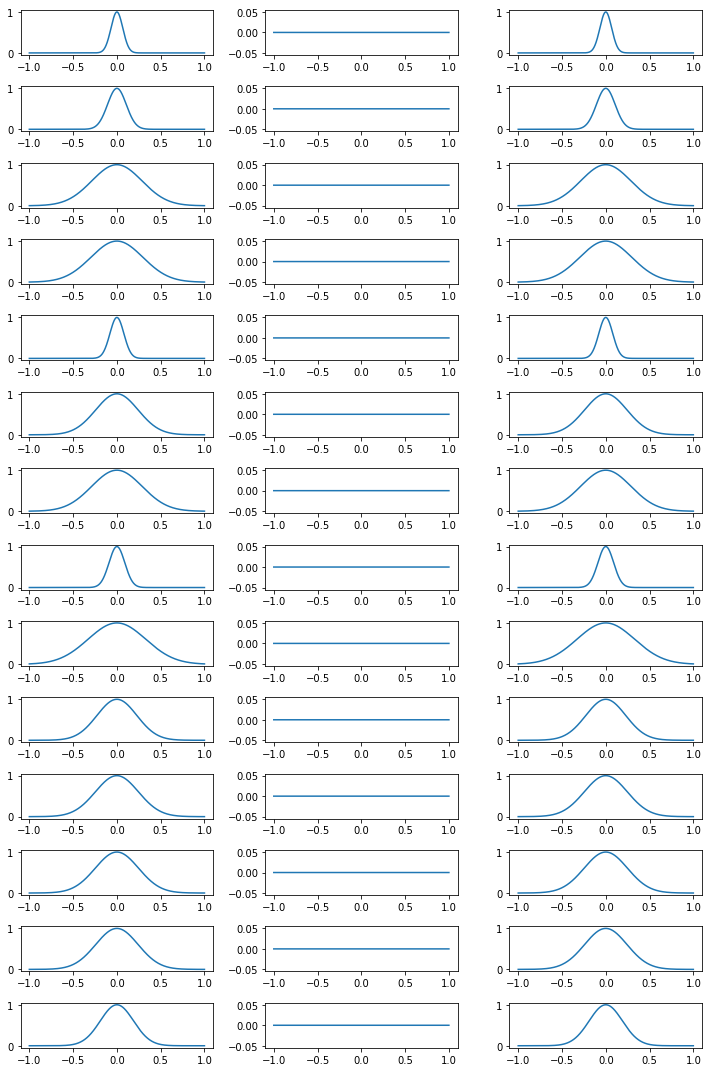

In [161]:
print_beams_matrix(x,beams_matrix_vis)

In [162]:
%%time
vis = simulate_visibilities_beams_sky(locs_uvw,sky,beams_matrix_vis)

CPU times: user 1min 30s, sys: 835 ms, total: 1min 31s
Wall time: 1min 36s


Make our list of closure triads

In [163]:
List_of_antennas = [[[0,2],[2,3],[3,0]],
                    [[1,3],[3,4],[4,1]],
                    [[2,5],[5,6],[6,2]],
                    [[3,6],[6,7],[7,3]],
                    [[4,7],[7,8],[8,4]],
                    [[6,9],[9,10],[10,6]],
                    [[7,10],[10,11],[11,7]],
                    [[10,12],[12,13],[13,10]]]

In [164]:
closures = generate_closure_triads_tp(vis,List_of_antennas)
print(closures)
print(calculate_closure_standard_deviation(closures))

[ 0.29587194 -0.78562861 -2.67396493  0.01502503 -0.50836812  3.11994259
 -0.10140439  0.06201443]
1.2025911855590081


So if you twiddle around with the LST paramter we definitely see low divergence when FornaxA is close to zenith, and poorer redundancy outside of this. 

Clearly the smoking gun is infront of us here. 

In [165]:
%%time
stddevs = []
for i in numpy.arange(0,2*numpy.pi,0.025):
    sources = find_gleam_sources(gleam_sources,i,HERA_LAT,8.0)
    sky = generate_sky_from_sources(sources,128)
    vis = simulate_visibilities_beams_sky(locs_uvw,sky,beams_matrix_vis)
    closures = generate_closure_triads_tp(vis,List_of_antennas)
    print("LST: ",i)
    print(closures)
    stdev = calculate_closure_standard_deviation(closures)
    stddevs.append(stdev)
    print("Circular Standard Deviation: ",stdev)
    print("--------------")

Number of Sources:  (219,)
LST:  0.0
[ 0.88239472 -0.93464045 -2.09565334 -0.19070327 -0.55441305 -2.55391878
  0.4162634   0.29642588]
Circular Standard Deviation:  1.201213529995302
--------------
Number of Sources:  (220,)
LST:  0.025
[ 1.02344465 -0.78197143 -1.90762114  0.15311607 -0.42197271 -2.71854796
  0.54176978  0.8343178 ]
Circular Standard Deviation:  1.3030449328911309
--------------
Number of Sources:  (220,)
LST:  0.05
[ 1.65301097 -0.11077124 -2.83731789  0.3619563  -0.16035704  2.76008256
  0.80757898  1.44108636]
Circular Standard Deviation:  1.3146919107923776
--------------
Number of Sources:  (220,)
LST:  0.07500000000000001
[ 1.80630481 -0.05035077 -2.60132848  0.6842349   0.05336724  2.96088324
  1.08902161  1.80735242]
Circular Standard Deviation:  1.3387005266348861
--------------
Number of Sources:  (219,)
LST:  0.1
[ 2.3585163   0.14762982 -1.35026524  1.11635201  0.19676664 -1.89445069
  1.70566382 -2.69005122]
Circular Standard Deviation:  2.14085214113303

In [166]:
stddevsnpy = numpy.asarray(stddevs)
numpy.savez("stddevs_10percent_err.npz",stddevs=stddevsnpy)

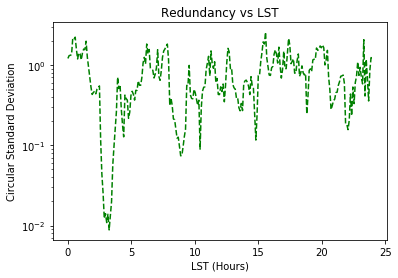

In [167]:
time = numpy.arange(0,2*numpy.pi,0.025)
time = (time/(2*numpy.pi))*24


plt.plot(time,stddevsnpy,'g--')
plt.yscale('log')
plt.title("Redundancy vs LST")
plt.xlabel("LST (Hours)")
plt.ylabel("Circular Standard Deviation")
plt.savefig("redundancysim.pdf")
plt.show()